### Importing Libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import json
import seaborn as sns
import nltk
import spacy
import re
import string

C:\Users\vishakha_deore\Anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


### Load Data

In [3]:
# file path
my_file = open("C:/Users/vishakha_deore/Documents/TRAINING/NLP/Client_data.json")
# returns JSON object as a dictionary
data = json.load(my_file)
# print(data)

In [4]:
# data

# load data using Python JSON module
# with open('C:/Users/vishakha_deore/Documents/TRAINING/NLP/Client_data.json','r') as my_file:
#     input_json = json.loads(my_file.read())
#     print(input_json)
# df = pd.read_json('C:/Users/vishakha_deore/Documents/TRAINING/NLP/Client_data.json')
# print(df)

In [5]:
# input_json = json.loads(my_file.read())

In [6]:
# Flatten data
input_df = pd.json_normalize(data)
input_df.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [7]:
# checking columns
input_df.columns

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [8]:
input_new_df = input_df.rename(columns = {'_source.product': 'Banking_Services','_source.sub_product':'Debts','_source.complaint_what_happened':'Complaints'})
input_new_df = input_new_df[['Banking_Services','Debts','Complaints']]
input_new_df

,Banking_Services,Debts,Complaints
0,Debt collection,Credit card debt,
1,Debt collection,Credit card debt,Good morning my name is XXXX XXXX and I apprec...
2,Credit card or prepaid card,General-purpose credit card or charge card,I upgraded my XXXX XXXX card in XX/XX/2018 and...
3,Mortgage,Conventional home mortgage,
4,Credit card or prepaid card,General-purpose credit card or charge card,
...,...,...,...
78308,Checking or savings account,Checking account,
78309,Credit card or prepaid card,General-purpose credit card or charge card,"On Wednesday, XX/XX/XXXX I called Chas, my XXX..."
78310,Checking or savings account,Checking account,I am not familiar with XXXX pay and did not un...
78311,Credit card or prepaid card,General-purpose credit card or charge card,I have had flawless credit for 30 yrs. I've ha...


In [9]:
input_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Banking_Services  78313 non-null  object
 1   Debts             67742 non-null  object
 2   Complaints        78313 non-null  object
dtypes: object(3)
memory usage: 1.8+ MB


In [10]:
input_new_df.describe()

,Banking_Services,Debts,Complaints
count,78313,67742,78313
unique,17,72,20931
top,Mortgage,Checking account,
freq,22725,17182,57241


In [11]:
#check  NAN values
input_new_df.Complaints.isnull().sum()

0

In [12]:
#check  NAN values
input_new_df.Banking_Services.isnull().sum()

0

In [13]:
#check  NAN values
input_new_df.Debts.isnull().sum()

10571

In [14]:
#check for blank cells any
a = input_new_df[input_new_df['Complaints']==''].count()
# b=input_new_df[input_new_df['Banking_Services']==''].count()
# c=input_new_df[input_new_df['Debts']==''].count()
# a,b,c
a

Banking_Services    57241
Debts               48779
Complaints          57241
dtype: int64

In [15]:
input_new_df[input_new_df['Complaints']=='']=np.nan

In [16]:
input_new_df

,Banking_Services,Debts,Complaints
0,NaN,NaN,NaN
1,Debt collection,Credit card debt,Good morning my name is XXXX XXXX and I apprec...
2,Credit card or prepaid card,General-purpose credit card or charge card,I upgraded my XXXX XXXX card in XX/XX/2018 and...
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
78308,NaN,NaN,NaN
78309,Credit card or prepaid card,General-purpose credit card or charge card,"On Wednesday, XX/XX/XXXX I called Chas, my XXX..."
78310,Checking or savings account,Checking account,I am not familiar with XXXX pay and did not un...
78311,Credit card or prepaid card,General-purpose credit card or charge card,I have had flawless credit for 30 yrs. I've ha...


In [17]:
input_new_df.Complaints.isnull().sum()

57241

In [18]:
# drop the blanks
input_new_df = input_new_df[~input_new_df['Complaints'].isnull()]
input_new_df

,Banking_Services,Debts,Complaints
1,Debt collection,Credit card debt,Good morning my name is XXXX XXXX and I apprec...
2,Credit card or prepaid card,General-purpose credit card or charge card,I upgraded my XXXX XXXX card in XX/XX/2018 and...
10,"Credit reporting, credit repair services, or o...",Other personal consumer report,Chase Card was reported on XX/XX/2019. However...
11,"Credit reporting, credit repair services, or o...",Credit reporting,"On XX/XX/2018, while trying to book a XXXX XX..."
14,Checking or savings account,Checking account,my grand son give me check for {$1600.00} i de...
...,...,...,...
78303,Credit card or prepaid card,General-purpose credit card or charge card,After being a Chase Card customer for well ove...
78309,Credit card or prepaid card,General-purpose credit card or charge card,"On Wednesday, XX/XX/XXXX I called Chas, my XXX..."
78310,Checking or savings account,Checking account,I am not familiar with XXXX pay and did not un...
78311,Credit card or prepaid card,General-purpose credit card or charge card,I have had flawless credit for 30 yrs. I've ha...


In [19]:
#checking if any null values
input_new_df.Complaints.isnull().sum()

0

In [20]:
input_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21072 entries, 1 to 78312
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Banking_Services  21072 non-null  object
 1   Debts             18963 non-null  object
 2   Complaints        21072 non-null  object
dtypes: object(3)
memory usage: 658.5+ KB


In [21]:
input_new_df.describe()

,Banking_Services,Debts,Complaints
count,21072,18963,21072
unique,17,67,20930
top,Credit card or prepaid card,Checking account,Chase has violated 15 USC 1692 by continuing c...
freq,5039,5030,11


In [22]:
#cleaning
def cleaning(context):
    context = context.lower()
    punctuation_list = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    print(punctuation_list)
        # Removing punctuations in string
    for values in context:
        if values in punctuation_list:
            test_str = test_str.replace(values, "")
            print("The string after removing punctuation: " + context)
        else: 
                print("The string has no punctuation" + context)
    # Removing square brackets    
    context = re.sub('\[.*\]','',context).strip()
    # Removing numbers from string
    context = re.sub('\S*\d\S*\s*','',context).strip()
    return context.strip()

In [23]:
input_new_df.Complaints = input_new_df.Complaints.apply(lambda x : cleaning(x))
input_new_df.Complaints.head()

!()-[]{};:'"\,<>./?@#$%^&*_~
The string has no punctuationgood morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services. 
in 2018 i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable. i am asking the bank to validate the debt. instead i been receiving mail every month from them attempting to collect a debt. 
i have a right to know this information as a consumer. 

chase account # xxxx xxxx xxxx xxxx thanks in advance for your help.
The string has no punctuationgood morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services. 
in 2018 i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable. i am asking the bank to validate the debt. instead i been receiving mail every month from them attempting to collect a debt. 
i have a right to know this information as a consumer. 

chase ac

UnboundLocalError: local variable 'test_str' referenced before assignment

In [24]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [25]:
from nltk.corpus import stopwords

In [26]:
# Lemmatization
nltk_stopwords = nlp.Defaults.stop_words#list
# words = set(nltk_stopwords)
def lemmatizer(text):
    doc = nlp(text)
    sent = [token.lemma_ for token in doc if not token.text in set(nltk_stopwords)]
    return ' '.join(sent)

In [27]:
input_new_df

,Banking_Services,Debts,Complaints
1,Debt collection,Credit card debt,Good morning my name is XXXX XXXX and I apprec...
2,Credit card or prepaid card,General-purpose credit card or charge card,I upgraded my XXXX XXXX card in XX/XX/2018 and...
10,"Credit reporting, credit repair services, or o...",Other personal consumer report,Chase Card was reported on XX/XX/2019. However...
11,"Credit reporting, credit repair services, or o...",Credit reporting,"On XX/XX/2018, while trying to book a XXXX XX..."
14,Checking or savings account,Checking account,my grand son give me check for {$1600.00} i de...
...,...,...,...
78303,Credit card or prepaid card,General-purpose credit card or charge card,After being a Chase Card customer for well ove...
78309,Credit card or prepaid card,General-purpose credit card or charge card,"On Wednesday, XX/XX/XXXX I called Chas, my XXX..."
78310,Checking or savings account,Checking account,I am not familiar with XXXX pay and did not un...
78311,Credit card or prepaid card,General-purpose credit card or charge card,I have had flawless credit for 30 yrs. I've ha...


In [28]:
# Apply lemmatization on complaints
input_new_df['lemma'] = input_new_df.Complaints.apply(lambda x: lemmatizer(x))

<ipython-input-28-f1f14a4640de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_new_df['lemma'] = input_new_df.Complaints.apply(lambda x: lemmatizer(x))


In [30]:
input_new_df.head()

,Banking_Services,Debts,Complaints,lemma
1,Debt collection,Credit card debt,Good morning my name is XXXX XXXX and I apprec...,good morning xxxx XXXX I appreciate help stop ...
2,Credit card or prepaid card,General-purpose credit card or charge card,I upgraded my XXXX XXXX card in XX/XX/2018 and...,I upgrade xxxx xxxx card XX / XX/2018 tell age...
10,"Credit reporting, credit repair services, or o...",Other personal consumer report,Chase Card was reported on XX/XX/2019. However...,"Chase Card report XX / XX/2019 . however , fra..."
11,"Credit reporting, credit repair services, or o...",Credit reporting,"On XX/XX/2018, while trying to book a XXXX XX...","on XX / XX/2018 , try book xxxx xxxx ticke..."
14,Checking or savings account,Checking account,my grand son give me check for {$1600.00} i de...,grand son check { $ 1600.00 } deposit chase ac...


In [41]:
clean_input_df = input_new_df[['Banking_Services','Complaints','lemma']]
clean_input_df.head()

,Banking_Services,Complaints,lemma
1,Debt collection,Good morning my name is XXXX XXXX and I apprec...,good morning xxxx XXXX I appreciate help stop ...
2,Credit card or prepaid card,I upgraded my XXXX XXXX card in XX/XX/2018 and...,I upgrade xxxx xxxx card XX / XX/2018 tell age...
10,"Credit reporting, credit repair services, or o...",Chase Card was reported on XX/XX/2019. However...,"Chase Card report XX / XX/2019 . however , fra..."
11,"Credit reporting, credit repair services, or o...","On XX/XX/2018, while trying to book a XXXX XX...","on XX / XX/2018 , try book xxxx xxxx ticke..."
14,Checking or savings account,my grand son give me check for {$1600.00} i de...,grand son check { $ 1600.00 } deposit chase ac...


In [44]:
def pos_tags(text):
    txt = nlp(text)
    sentence = [token.text for token in txt if token.tag_ =='NN']
    return ' '.join(sentence)

In [45]:
#modified dataframe
clean_input_df['pos_removed'] = clean_input_df.lemma.apply(lambda x: pos_tags(x))
clean_input_df.head()

,Banking_Services,Complaints,lemma,pos_removed
1,Debt collection,Good morning my name is XXXX XXXX and I apprec...,good morning xxxx XXXX I appreciate help stop ...,morning xxxx XXXX help cardmember service debt...
2,Credit card or prepaid card,I upgraded my XXXX XXXX card in XX/XX/2018 and...,I upgrade xxxx xxxx card XX / XX/2018 tell age...,xxxx card agent anniversary date change agent ...
10,"Credit reporting, credit repair services, or o...",Chase Card was reported on XX/XX/2019. However...,"Chase Card report XX / XX/2019 . however , fra...",report application submit identity consent ser...
11,"Credit reporting, credit repair services, or o...","On XX/XX/2018, while trying to book a XXXX XX...","on XX / XX/2018 , try book xxxx xxxx ticke...",book xxxx ticket ticket reward card informatio...
14,Checking or savings account,my grand son give me check for {$1600.00} i de...,grand son check { $ 1600.00 } deposit chase ac...,son check deposit chase account fund chase ban...


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 5.  ,  5.22,  5.44,  5.66,  5.88,  6.1 ,  6.32,  6.54,  6.76,
         6.98,  7.2 ,  7.42,  7.64,  7.86,  8.08,  8.3 ,  8.52,  8.74,
         8.96,  9.18,  9.4 ,  9.62,  9.84, 10.06, 10.28, 10.5 , 10.72,
        10.94, 11.16, 11.38, 11.6 , 11.82, 12.04, 12.26, 12.48, 12.7 ,
        12.92, 13.14, 13.36, 13.58, 13.8 , 14.02, 14.24, 14.46, 14.68,
        14.9 , 15.12, 15.34, 15.56, 15.78, 16.  ]),
 <BarContainer object of 50 artists>)

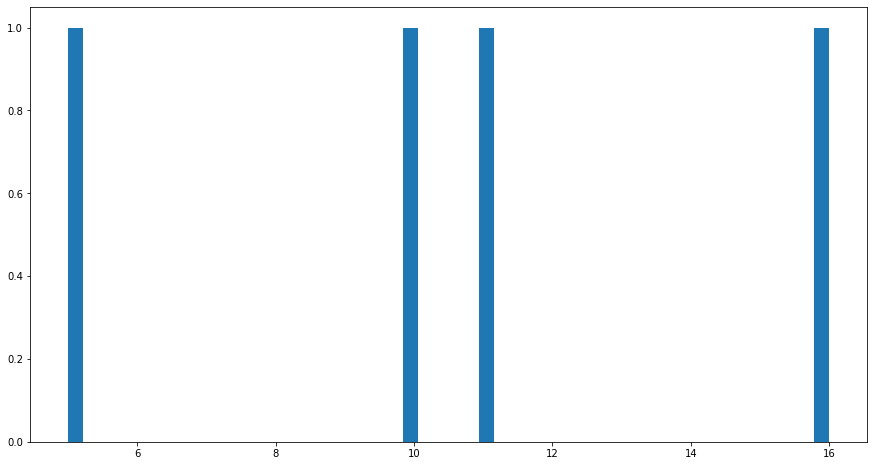

In [47]:
#data visualisation
plt.figure(figsize = (15, 8))
text_length= [len(d) for d in clean_input_df ]
plt.hist(text_length, bins = 50)

In [49]:
clean_input_df['clean_complaints'] = clean_input_df['pos_removed'].str.replace('-PRON-', '')
clean_input_df = clean_input_df.drop(['pos_removed'], axis = 1)

In [55]:
print(clean_input_df)

                                        Banking_Services  \
1                                        Debt collection   
2                            Credit card or prepaid card   
10     Credit reporting, credit repair services, or o...   
11     Credit reporting, credit repair services, or o...   
14                           Checking or savings account   
...                                                  ...   
78303                        Credit card or prepaid card   
78309                        Credit card or prepaid card   
78310                        Checking or savings account   
78311                        Credit card or prepaid card   
78312                                        Payday loan   

                                              Complaints  \
1      Good morning my name is XXXX XXXX and I apprec...   
2      I upgraded my XXXX XXXX card in XX/XX/2018 and...   
10     Chase Card was reported on XX/XX/2019. However...   
11     On XX/XX/2018, while trying to b

In [ ]:
#removing masked text
clean_input_df['clean_complaints'] = clean_input_df['clean_complaints'].str.replace('XXXX','')

In [59]:
clean_input_df.head()

,Banking_Services,Complaints,lemma,clean_complaints
1,Debt collection,Good morning my name is XXXX XXXX and I apprec...,good morning xxxx XXXX I appreciate help stop ...,morning xxxx XXXX help cardmember service debt...
2,Credit card or prepaid card,I upgraded my XXXX XXXX card in XX/XX/2018 and...,I upgrade xxxx xxxx card XX / XX/2018 tell age...,xxxx card agent anniversary date change agent ...
10,"Credit reporting, credit repair services, or o...",Chase Card was reported on XX/XX/2019. However...,"Chase Card report XX / XX/2019 . however , fra...",report application submit identity consent ser...
11,"Credit reporting, credit repair services, or o...","On XX/XX/2018, while trying to book a XXXX XX...","on XX / XX/2018 , try book xxxx xxxx ticke...",book xxxx ticket ticket reward card informatio...
14,Checking or savings account,my grand son give me check for {$1600.00} i de...,grand son check { $ 1600.00 } deposit chase ac...,son check deposit chase account fund chase ban...


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [65]:
# Feature Extraction
tf_dif = TfidfVectorizer(min_df = 2, max_df = 0.95, stop_words = 'english')

In [71]:
doc_tm = tf_dif.fit_transform(clean_input_df.clean_complaints)

In [73]:
print(doc_tm)

  (0, 176)	0.23799814170094394
  (0, 5930)	0.26983698652243415
  (0, 1302)	0.17016759650026664
  (0, 3040)	0.11623894624473034
  (0, 445)	0.17585480943499635
  (0, 3790)	0.11645004672029152
  (0, 3519)	0.14712069467038763
  (0, 6269)	0.2822335045315969
  (0, 547)	0.09514052308630362
  (0, 5608)	0.143639233805263
  (0, 6306)	0.23151249046484054
  (0, 1562)	0.5084627448966802
  (0, 5311)	0.1276187446674385
  (0, 874)	0.3237784006602257
  (0, 2793)	0.3004150699085702
  (0, 6532)	0.2901140568240952
  (0, 3800)	0.2119902892480575
  (1, 3726)	0.26578037837218793
  (1, 1271)	0.21612193375764954
  (1, 100)	0.06595115273096717
  (1, 4038)	0.14657800693903042
  (1, 957)	0.30287009122998027
  (1, 1537)	0.23559492491581852
  (1, 306)	0.6219444005693453
  (1, 212)	0.5298266036987451
  :	:
  (21070, 2334)	0.12119036879498903
  (21070, 4176)	0.11552570742236362
  (21070, 4966)	0.07476733599565182
  (21070, 1452)	0.14721737507383315
  (21070, 872)	0.28505967949598954
  (21070, 6532)	0.0263248421508762

In [74]:
tf_dif.get_feature_names()[:10]

['00', '000', '0111', '0n', '10', '10day', '10min', '10yr', '12', '13th']

In [75]:
len(tf_dif.get_feature_names())

6577

In [68]:
from sklearn.decomposition import NMF

In [77]:
ini_topics = 5

#nmf model
model_nmf = NMF(n_components = ini_topics, random_state = 40)
w1 = model_nmf.fit_transform(doc_tm)
h1 = model_nmf.components_

In [83]:
topic_top_words = 15

vocabulary = np.array(tf_dif.get_feature_names())

t_words = lambda t:[vocabulary[i] for i in np.argsort(t)[:-topic_top_words-1:-1]]
topics = ([t_words(t) for t in h1])

top = [' '.join(t) for t in topics]
print(vocabulary)

['00' '000' '0111' ... 'zombie' 'zone' 'zoom']


In [84]:
top

['xxxx number letter email information state phone date document contact complaint money claim address request',
 'credit card report inquiry account score company information application limit debt letter chase bureaus year',
 'account bank check money deposit fund day branch checking chase business transfer transaction number customer',
 'payment loan mortgage month modification time year pay balance rate home statement day date property',
 'charge card fee dispute transaction merchant purchase balance refund service statement time fraud month overdraft']

In [87]:
colnames = ['Topic' + str(i) for i in range(model_nmf.n_components)]
docnames = ['Doc' + str(i) for i in range(len(clean_input_df.clean_complaints))]
topic_doc_df = pd.DataFrame(np.round(w1, 2), columns = colnames, index = docnames)
signi_topic = np.argmax(topic_doc_df.values, axis =1)
topic_doc_df['dominant_topic'] = signi_topic
topic_doc_df.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.04,0.01,0.01,0.01,0.01,0
Doc1,0.02,0.01,0.01,0.00,0.01,0
Doc2,0.00,0.04,0.00,0.00,0.00,1
Doc3,0.02,0.05,0.02,0.00,0.00,1
Doc4,0.01,0.00,0.09,0.00,0.00,2


In [88]:
clean_input_df['Topic'] = signi_topic

In [89]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-89-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [97]:
clean_input_df[['Complaints', 'clean_complaints', 'Banking_Services', 'Topic']][clean_input_df.Topic == 4].head(30)

,Complaints,clean_complaints,Banking_Services,Topic
30,"To whom it may concern, Chase bank charged wrongly overdraft fees, I have alert of low balance or unsuficent fee balance and always deposit immediatly to cover transactions if needed but Chase always changed the order and charged me overdraft fee anyway. when you call they said their per their guidelines they don't refund more then 2 overdrawft doesn't matter bank fault or not.\n\nTaken {$34.00} from people is money just because you can is not Ok.\n\nSee attached documents. When Chase refund, they always find the way to take back what they refunded in first place.",concern bank charge overdraft fee balance fee balance deposit transaction change order charge overdraft fee guideline overdrawft matter bank fault money document way place,Checking or savings account,4
32,My chase amazon card was declined for a catering order I had placed for my brothers funeral in the amount of {$710.00}. I contacted chase around noon today XX/XX/2019 and was asked the last 4 numbers of my chase savings account and the other user on my account. I responded that I did not have a savings and I am only authorized user. Customer rep told me they would call me back in 10 minutes to keep the line open. I didnt receive a call back after an hour so I contacted chase. From the first call I thought someone was using my card fraudulently. I spoke to the rep who transferred me to a supervisor XXXX who said the card was activated and the transaction would process. Called the catering company and card was declined. I then used my XXXX XXXX card to pay for the order. XXXX XXXX texted me asking if I was authorizing purchase and I responded yes. Contacted caterer and XXXX XXXX was declined. I contacted chase again spoke to rep was told the initial questions are used to trick people to see what there answer would be. She told me the CVV code was incorrectly being input by the caterer and I responded that I had gone over the numbers and CVV used was correct. She told me the card was cleared for the purchase and she would monitor it for 24 hours. Called caterer - card declined. Use a MasterCard which processed. Went to use chase amazon at restaurant at XXXX pm tonight in the amount of {$63.00} - it was declined. I was told by chase I was not over limit. Still frustrated figuring out multiple declines after several conversations with chase stating the card would be ok to use. Embarrassed as the caterer kept suggesting I was over my limit which I pay my card in full every month and chase confirmed that I was under my limit with the {$710.00} transaction. Never been declined by either chase or XXXX XXXX before - today after multiple assurances that I was all set and card would be monitored to make sure transaction would clear - it never did,amazon card decline catering order brother funeral chase noon today number chase saving account user account user customer rep minute line hour chase card rep transfer supervisor xxxx card activate transaction process company card decline xxxx card pay order xxxx texte purchase caterer xxxx XXXX decline chase rep question trick code input caterer number card purchase monitor hour caterer card decline process chase amazon restaurant XXXX pm tonight decline chase figure decline conversation chase state card use embarrass caterer card month chase transaction chase xxxx xxxx today assurance card monitor transaction,Credit card or prepaid card,4
40,"XXXX XXXX a sofa, love seat, table and chairs and was never delivered. Debit card charged {$2400.00}. Bank says Visa denied claim, we have no furniture and no money.",xxxx xxxx sofa love seat table chair deliver card charge Bank deny claim furniture money,Checking or savings account,4
45,"I made a purchase with XXXX XXXX XXXX on XX/XX/2019 in the amount of {$38.00}. I was charged twice for this transaction. I placed a disputes case with Chase bank on XX/XX/2019 when I noticed the charge on my account. I called back on Sunday, XX/XX/2019 ab

In [98]:
#first 10 complaints

tmp = clean_input_df[['Complaints', 'clean_complaints', 'Banking_Services', 'Topic']].groupby('Topic').head(10)
tmp.sort_values('Topic')

,Complaints,clean_complaints,Banking_Services,Topic
1,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,morning xxxx XXXX help cardmember service debt verification statement bank validate debt mail month attempt debt information consumer xxxx xxxx xxxx thank advance help,Debt collection,0
73,"I have wired through one of Chase branches in XXXX XXXX, the exact Reinstatement Amount of {$43000.00} to JPMorgan Chase Bank In order to remove/withdraw their wrongful foreclosure proceedings on my residential property.\n\nHowever, the Chase Executive Ms. XXXX XXXX, and it's trustee, XXXX XXXX XXXX XXXX are not honoring even their own rules and regulations, she wants the Total Payoff of {$100000.00} now in order to remove their wrongful foreclosure proceedings with Sales Date of XX/XX/2019 at XXXX XXXX on my family resident.\n\nShe knows I can not prepare XXXX in such a short time. That's why I asked for minimum reinstatement amount to avoid foreclosure without resorting to Chapter XXXX- bankruptcy filing.\n\nI appreciate you assistant in bringing JPMorgan Chase and it's foreclosure trustee, XXXX XXXX XXXX XXXX. "" Quality '' to their senses, and stop harassing my family with their fraudulent default claim as explained in my previous complaint about them on XX/XX/XXXX.\n\nMy previous complaint ID is. XXXX, submitted XX/XX/2019. Product : Mortgage Issue wrongful foreclosure.\n\nThank you, XXXX XXXX Tell : ( XXXX ) XXXX Email : XXXX XXXX",branch XXXX XXXX order foreclosure property trustee xxxx xxxx xxxx xxxx honor rule regulation order foreclosure XXXX xxxx family resident xxxx time reinstatement foreclosure resort chapter xxxx- bankruptcy filing assistant bring foreclosure trustee xxxx xxxx xxxx xxxx sense family default claim complaint complaint product mortgage issue foreclosure xxxx xxxx xxxx XXXX email xxxx xxxx,Mortgage,0
59,"I currently have over XXXX Chase Ultimate Rewards points, which are worth at least {$7500.00}. \n\nAround XX/XX/2018 ( 4 months ago ), when I tried to access my Chase Ultimate Rewards account ( or even activate the 5 % bonus on Chase Freedom ), I would get shown this page that says "" We are unable to complete your request at this time '' ( image attached as well ) : XXXX : XXXX At first I thought it was just a temporary error ( which isn't uncommon for Chase ), but after 2 weeks this was still happening, so I called customer support. They opened a ticket, got escalated to their tech team, but when I would call back to find out what happened, they told me that the case had been closed. This happened 3 times, and each call has taken a lot of time to explain the situation and verify a bunch of information. \n\nGoing from ultimaterewards.com and chase.com have the same result. \n\nI'm not able to use these points by phone either, because the operators for the Travel Center are not able to access my account/points neither. \n\nI've tried every browser, both XXXX and XXXX computers, and the XXXX Chase phone application. They all send me to the page that says "" We are unable to complete your request at this time '' On XX/XX/XXXX, I looked up some people that work in Ultimate Rewards on XXXX, and cold called a VP of Customer Relations. He acted like he was helpful at first, and we exchanged some emails. He eventually said I can buy a flight/hotel using Chase Sapphire and if I give him the details, he will deduct the appropriate points and credit my credit card for the purchase. \n\nLong story short, he wasn't able to fix anything. \n\nI can see that I'm still collecting points, but I 

In [102]:
top_map = {
    0:'Bank Account Services',
    1:'Cards',
    2:'Others',
    3:'Issues',
    4:'Loan'
}

clean_input_df['Topic'] = clean_input_df['Topic'].map(top_map)
clean_input_df.head()

,Banking_Services,Complaints,lemma,clean_complaints,Topic
1,Debt collection,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,good morning xxxx XXXX I appreciate help stop Chase Bank cardmember service . \n in 2018 I write Chase ask debt verification send statement acceptable . I ask bank validate debt . instead I receive mail month attempt collect debt . \n I right know information consumer . \n\n Chase account # xxxx xxxx xxxx xxxx thank advance help .,morning xxxx XXXX help cardmember service debt verification statement bank validate debt mail month attempt debt information consumer xxxx xxxx xxxx thank advance help,Bank Account Services
2,Credit card or prepaid card,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,I upgrade xxxx xxxx card XX / XX/2018 tell agent upgrade anniversary date change . it turn agent give wrong information order upgrade account . xxxx change anniversary date XX / XX / XXXX XX / XX / XXXX consent ! xxxx recording agent mislead .,xxxx card agent anniversary date change agent information order account change anniversary date XXXX consent xxxx agent mislead,Bank Account Services
10,"Credit reporting, credit repair services, or other personal consumer reports","Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.","Chase Card report XX / XX/2019 . however , fraudulent application submit identity consent fraudulently obtain service . do extend credit verify identity applicant .",report application submit identity consent service credit identity applicant,Cards
11,"Credit reporting, credit repair services, or other personal consumer reports","On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chase Bank. I then immediately contacted Chase bank within no more than 10minutes of getting the notification on the screen and I was told by the Chase representative I spoke with that my application was denied but she could not state why. I asked for more information about the XXXX offer and she explained that even if I had been approved, the credit offer only gets applied after the first account statement and could not be used to purchase the ticket. I then explicitly told her I was glad I got denied and I was ABSOLUTELY no longer interested in the account. I asked that the application be withdrawn and the representative obliged. This all happened no later than 10mins after putting in the application on XX/XX/2018. Notwithstanding my explicit request not to proceed with the application and contrary to what I was told by the Chase representative, Chase did in fact go ahead to open a credit account in my name on XX/XX/2018. This is now being reported in my Credit Report and Chase has refused to correct this information on my credit report even though they went ahead to process an application which I did not consent to and out of the

<AxesSubplot:xlabel='Topic', ylabel='count'>

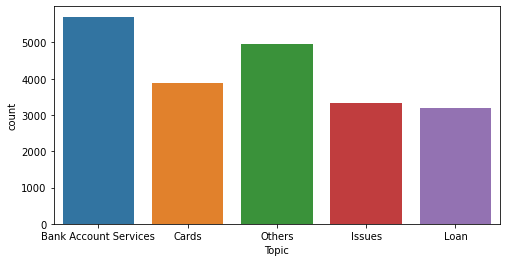

In [106]:
#plot
plt.figure(figsize = (8,4))
sns.countplot(x = 'Topic', data = clean_input_df)

In [107]:
train_dt = clean_input_df[['Complaints', 'Topic']]

In [108]:
train_dt.head()

,Complaints,Topic
1,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Bank Account Services
2,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Bank Account Services
10,"Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.",Cards
11,"On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chase Bank. I then immediately contacted Chase bank within no more than 10minutes of getting the notification on the screen and I was told by the Chase representative I spoke with that my application was denied but she could not state why. I asked for more information about the XXXX offer and she explained that even if I had been approved, the credit offer only gets applied after the first account statement and could not be used to purchase the ticket. I then explicitly told her I was glad I got denied and I was ABSOLUTELY no longer interested in the account. I asked that the application be withdrawn and the representative obliged. This all happened no later than 10mins after putting in the application on XX/XX/2018. Notwithstanding my explicit request not to proceed with the application and contrary to what I was told by the Chase representative, Chase did in fact go ahead to open a credit account in my name on XX/XX/2018. This is now being reported in my Credit Report and Chase has refused to correct this information on my credit report even though they went ahead to process an application which I did not consent to and out of their error.",Cards
14,my grand son give me check for {$1600.00} i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase 2 times they told him i should call not him to verify the check owner he is out the country most the time date happen XX/XX/2018 check number XXXX claim number is XXXX with chase,Others


In [130]:
# Reverse topic names
topic_mapping_reverse = {
    'Bank Account Services':0,
    'Cards':1,
    'Others':2,
    'Issues':3,
    'Loan':4
}

In [131]:
train_dt[['Complaints', 'Topic']][train_dt.Topic == 2].head(30)

,Complaints,Topic


In [132]:
#Split

X = train_dt.Complaints
y = train_dt.Topic

In [133]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

In [134]:
# Get vector count

vector_count = CountVectorizer()
X_vect = vector_count.fit_transform(X)

In [135]:
tfdif_transform = TfidfTransformer()
X_tfdif = tfdif_transform.fit_transform(X_vect)

In [136]:
#Train-Test Split

x_train, x_test, y_train, y_test = train_test_split(X_tfdif, y, test_size = 0.25, random_state = 40, stratify = y)